In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from obspy import read
from obspy.core import UTCDateTime
from obspy.core.stream import Stream
from SeismicData import SeismicData

In [2]:
root_folder = "E:\\UDINA_2018\\miniSEED"
ud01_data_folder_path = root_folder+"\\UD01"
ud02_data_folder_path = root_folder+"\\UD02"
ud03_data_folder_path = root_folder+"\\UD03"
ud04_data_folder_path = root_folder+"\\UD04"

directions_data_folders = ["6d97e2", "6d97n2", "6d97z2"]

In [3]:
def process_station_data(station_data_folder, file_num):
    import os 
    station_data = Stream()
    for direction in directions_data_folders:
        direction_stream = Stream()
        data_folder = station_data_folder+"\\"+direction
        for filename in (os.listdir(data_folder))[file_num:file_num+10]:
            input_stream=read(data_folder+"\\"+filename)
            direction_stream += input_stream
        direction_stream.merge(fill_value=0)
        station_data+=direction_stream
    return station_data

def square_sum (seismic_data):
    square_sum = list()
    for i, time in enumerate(seismic_data.times):
        summ = np.float64(0)
        for trace in seismic_data.traces:
            summ+=trace[i]*trace[i]
        summ /= seismic_data.alive_traces_count[i]
        square_sum.append((time, summ))
    return square_sum

def union_close_times(times):
    united_times = []
    for i in range(len(times)):
        if times[i].minute - times[i-1].minute < 1:
            continue
        else:
            united_times.append(times[i])
    
    return united_times
def moving_average(a, n):
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

In [4]:
%%time
file_num = 10
station_data = process_station_data(ud01_data_folder_path, file_num)
station_data += process_station_data(ud02_data_folder_path, file_num)
station_data += process_station_data(ud03_data_folder_path, file_num)
station_data += process_station_data(ud04_data_folder_path, file_num)

min_filtering_frequency = 0.1
max_filtering_frequency = 30
station_data = station_data.detrend()
station_data = station_data.filter("bandpass", freqmin=min_filtering_frequency,freqmax = max_filtering_frequency)



C:\ProgramData\Anaconda3\lib\site-packages\obspy\signal\detrend.py:31: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(data.dtype, float):


Wall time: 30.8 s


In [5]:
%%time
seismic_data = SeismicData(station_data)
squareSum = square_sum(seismic_data)
x = list()
y = list()

for item in squareSum:
    x.append(item[0])
    y.append(item[1])

m=2250
x_av = np.asarray(x.copy())
y_av = moving_average(y.copy(), m)
x_av = x_av[:len(y_av)]

Station data preprocessing...
max trace = .6D97..HHE | 2018-05-06T10:00:00.000000Z - 2018-05-06T19:59:59.990000Z | 100.0 Hz, 3600000 samples
max trace times = [UTCDateTime(2018, 5, 6, 10, 0) UTCDateTime(2018, 5, 6, 10, 0, 0, 10000)
 UTCDateTime(2018, 5, 6, 10, 0, 0, 20000) ...
 UTCDateTime(2018, 5, 6, 19, 59, 59, 970000)
 UTCDateTime(2018, 5, 6, 19, 59, 59, 980000)
 UTCDateTime(2018, 5, 6, 19, 59, 59, 990000)]
Trace preprocessing...
Trace preprocessing finished
Trace preprocessing...
Trace preprocessing finished
Trace preprocessing...
Trace preprocessing finished
Trace preprocessing...
Trace preprocessing finished
Trace preprocessing...
Trace preprocessing finished
Trace preprocessing...
Trace preprocessing finished
Trace preprocessing...
Trace preprocessing finished
Trace preprocessing...
Trace preprocessing finished
Trace preprocessing...
Trace preprocessing finished
Trace preprocessing...
Trace preprocessing finished
Trace preprocessing...
Trace preprocessing finished
Trace preproce

In [6]:
from scipy.signal import find_peaks
peaks, _ = find_peaks(y_av, height=0.08e8)
print('len peaks = {}'.format(len(peaks)))
lpeaks = np.asarray(peaks)
x_av = np.asarray(x_av)

len peaks = 6


In [17]:
times = station_data[0].times("utcdatetime")
peaks_times = times[lpeaks]
filtered_times = union_close_times(peaks_times)
filtered_times.append(peaks_times[len(peaks_times)-1])
print(filtered_times)

[UTCDateTime(2018, 5, 6, 11, 39, 49, 90000), UTCDateTime(2018, 5, 6, 13, 21, 43, 450000)]


In [13]:
new = [x.datetime.strftime("%Y-%m-%d %H:%M:%S") for x in  x_av[::120000]]
xi = [i for i in range(0, len(new))]
y = np.random.rand(len(xi))

In [14]:
new

['2018-05-06 10:00:00',
 '2018-05-06 10:20:00',
 '2018-05-06 10:40:00',
 '2018-05-06 11:00:00',
 '2018-05-06 11:20:00',
 '2018-05-06 11:40:00',
 '2018-05-06 12:00:00',
 '2018-05-06 12:20:00',
 '2018-05-06 12:40:00',
 '2018-05-06 13:00:00',
 '2018-05-06 13:20:00',
 '2018-05-06 13:40:00',
 '2018-05-06 14:00:00',
 '2018-05-06 14:20:00',
 '2018-05-06 14:40:00',
 '2018-05-06 15:00:00',
 '2018-05-06 15:20:00',
 '2018-05-06 15:40:00',
 '2018-05-06 16:00:00',
 '2018-05-06 16:20:00',
 '2018-05-06 16:40:00',
 '2018-05-06 17:00:00',
 '2018-05-06 17:20:00',
 '2018-05-06 17:40:00',
 '2018-05-06 18:00:00',
 '2018-05-06 18:20:00',
 '2018-05-06 18:40:00',
 '2018-05-06 19:00:00',
 '2018-05-06 19:20:00',
 '2018-05-06 19:40:00']

No handles with labels found to put in legend.


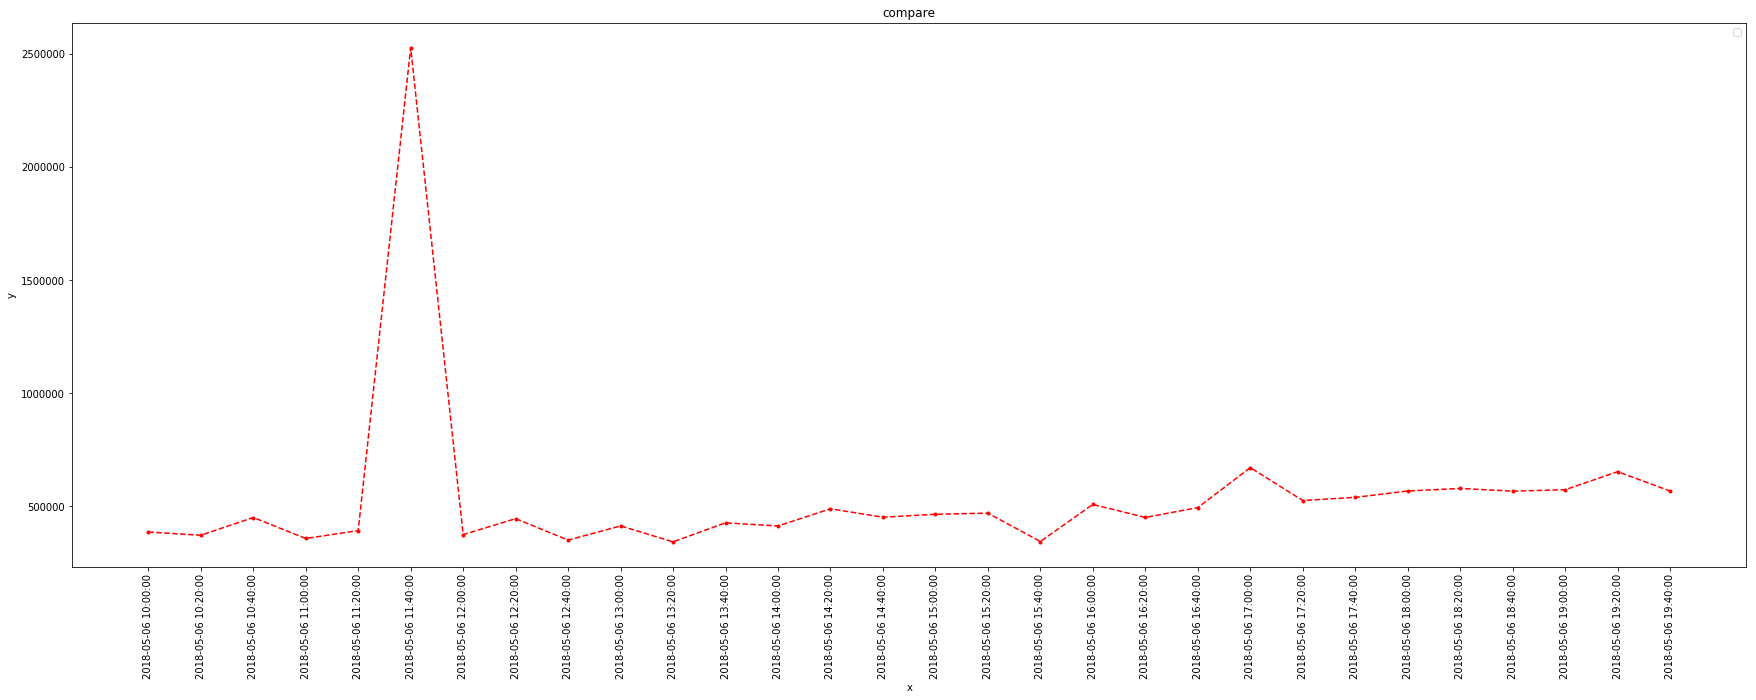

In [21]:
import matplotlib.pyplot as plt
# create an index for each tick position
plt.figure(figsize=(30,10))
plt.xlabel('x')
plt.ylabel('y') 
plt.xticks(xi, new, rotation=90)
plt.title('compare')
plt.legend() 
plt.plot(xi, y_av[::120000], marker='.', linestyle='--', color='r', label='Square') 
plt.savefig('test_lbl_123')

In [17]:
plt.savefig('test_lbl.png')

<Figure size 432x288 with 0 Axes>

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(30,10))
plt.plot(x_av,y_av)
plt.xlabel('x')
plt.ylabel('y') 

#plt.xticks(x_av, new)
#plt.plot(x_av[lpeaks], y_av[lpeaks], "x")
plt.show()

In [18]:
for i in range(len(filtered_times)):
    f_time = filtered_times[i]
    ind = np.where(times==f_time)[0][0]
    print('ind: {0}'.format(ind))
    startInd = ind - 1500
    endInd = ind + 3000
    copy = station_data.copy()
    trimed = copy.trim(starttime=times[startInd], endtime=times[endInd])
    print('trimed: {0}'.format(trimed))
    trimed.write("test{0}.msd".format(ind), format="MSEED")

ind: 598909
trimed: 12 Trace(s) in Stream:
.6D97..HHE | 2018-05-06T11:39:34.090000Z - 2018-05-06T11:40:19.090000Z | 100.0 Hz, 4501 samples
.6D97..HHN | 2018-05-06T11:39:34.090000Z - 2018-05-06T11:40:19.090000Z | 100.0 Hz, 4501 samples
.6D97..HHZ | 2018-05-06T11:39:34.090000Z - 2018-05-06T11:40:19.090000Z | 100.0 Hz, 4501 samples
.6D98..HHE | 2018-05-06T11:39:34.090000Z - 2018-05-06T11:40:19.090000Z | 100.0 Hz, 4501 samples
.6D98..HHN | 2018-05-06T11:39:34.090000Z - 2018-05-06T11:40:19.090000Z | 100.0 Hz, 4501 samples
.6D98..HHZ | 2018-05-06T11:39:34.090000Z - 2018-05-06T11:40:19.090000Z | 100.0 Hz, 4501 samples
.6E02..HHE | 2018-05-06T11:39:34.090000Z - 2018-05-06T11:40:19.090000Z | 100.0 Hz, 4501 samples
.6E02..HHN | 2018-05-06T11:39:34.090000Z - 2018-05-06T11:40:19.090000Z | 100.0 Hz, 4501 samples
.6E02..HHZ | 2018-05-06T11:39:34.090000Z - 2018-05-06T11:40:19.090000Z | 100.0 Hz, 4501 samples
.6E09..HHE | 2018-05-06T11:39:34.090000Z - 2018-05-06T11:40:19.090000Z | 100.0 Hz, 4501 sampl

C:\ProgramData\Anaconda3\lib\site-packages\obspy\io\mseed\core.py:772: UserWarning: The encoding specified in trace.stats.mseed.encoding does not match the dtype of the data.
A suitable encoding will be chosen.
  warnings.warn(msg, UserWarning)


ind: 1210345
trimed: 12 Trace(s) in Stream:
.6D97..HHE | 2018-05-06T13:21:28.450000Z - 2018-05-06T13:22:13.450000Z | 100.0 Hz, 4501 samples
.6D97..HHN | 2018-05-06T13:21:28.450000Z - 2018-05-06T13:22:13.450000Z | 100.0 Hz, 4501 samples
.6D97..HHZ | 2018-05-06T13:21:28.450000Z - 2018-05-06T13:22:13.450000Z | 100.0 Hz, 4501 samples
.6D98..HHE | 2018-05-06T13:21:28.450000Z - 2018-05-06T13:22:13.450000Z | 100.0 Hz, 4501 samples
.6D98..HHN | 2018-05-06T13:21:28.450000Z - 2018-05-06T13:22:13.450000Z | 100.0 Hz, 4501 samples
.6D98..HHZ | 2018-05-06T13:21:28.450000Z - 2018-05-06T13:22:13.450000Z | 100.0 Hz, 4501 samples
.6E02..HHE | 2018-05-06T13:21:28.450000Z - 2018-05-06T13:22:13.450000Z | 100.0 Hz, 4501 samples
.6E02..HHN | 2018-05-06T13:21:28.450000Z - 2018-05-06T13:22:13.450000Z | 100.0 Hz, 4501 samples
.6E02..HHZ | 2018-05-06T13:21:28.450000Z - 2018-05-06T13:22:13.450000Z | 100.0 Hz, 4501 samples
.6E09..HHE | 2018-05-06T13:21:28.450000Z - 2018-05-06T13:22:13.450000Z | 100.0 Hz, 4501 samp